In [1]:
from pymatgen.ext.matproj import MPRester

with MPRester ("z5aIUAkpFPTHndsr") as m:
    
    #Création de la structure du cristal à partir du MP
    structure = m.get_structure_by_material_id("mp-15783")

In [ ]:
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import BoltztrapPlotter
from pymatgen.electronic_structure.boltztrap import BoltztrapAnalyzer
import numpy as np
import matplotlib.pyplot as plt

#Création de la structure de bande du cristal
bandstruct = m.get_bandstructure_by_material_id("mp-15783")

#Création d'un objet BSPlotter pour pouvoir afficher le graphe
BS = BSPlotter(bandstruct)

#Récupération des éléments intéressant de la structure de bande
Elem = BS.bs_plot_data()




Danc cette partie, nous allons analyser la strcuture de bande du cristal $KSmS_2$. 

L'image ci-dessous représente la zone de Brillouin ainsi que les points critiques que nous serons utiles pour le reste de la question 

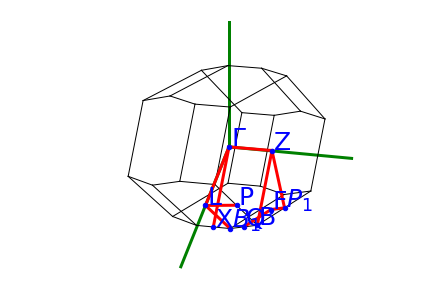

In [32]:
BS.plot_brillouin()

# 1) Bande interdite <h1>
    
Par définition, la bande interdite est une bande dans laquelle aucun niveau d'énergie ne peut être occupé par les électrons du cristal. Cela signifie donc que la densité d'état sur cette bande est nulle. Dans notre cas, la bande interdite est déterminée par la fonction  suivante :

In [27]:
#Détermination de la bande interdite
BI = bandstruct.get_band_gap()
print(BI)

{'direct': False, 'energy': 2.2759, 'transition': '\\Gamma-F'}


La bande interdite est dite "indirecte", c'est-à-dire que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. Il faudra donc apporter à un électron une énergie supérieure à la valeur de la bande interdite pour le faire passer de la bande de valence à la bande de conduction. 

La bande interdite a comme valeur 2.2759eV et la transition se fait du kpoint $\Gamma$ au kpoint F.

Sur l'image ci-dessous, le maximum de la dernière bande de valence est représentée par un point vert et le minimum de la première bande de conduction par un point rouge. La flèche indique la transition et la partie rouge représente la bande interdite. 
<img src="https://github.com/sderaedemack/lmapr1492/blob/master/Images/Bande_interdite.png?raw=true" width="600">

# 2) Dispersion <h>
    
Pour trouver les directions dans la dernière (première) bande de valence (conduction) présentant le plus et le moins de dispersion, nous regardons la valeur absolue la plus (moins) élevée de $\Delta(E-E_f)$ dans chaque zone définie par les axes verticaux.

In [167]:
#########Bande de valence#########
#Création de variable pour pouvoir trouver le delta maximum et minimu 
xi = 0 #Valeur du vecteur d'onde k à gauche
bandsi = 0 #Valeur de l'énergie à gauche
xf = 0 #Valeur du vecteur d'onde k à droite
bandsf = 0 #Valeur de l'énergie à droite
delta_max = 0 #Valeur du delta maximum
delta_min = 100 #valeur du delta minimum
x_max  = [0,0] #Paire de valeurs de vecteur d'onde là où se situe le delta maximum
bands_max = [0,0] #Paire de valeur d'énergie où se situe le delta maximum
x_min = [0,0] #Paire de valeurs de vecteur d'onde là où se situe le delta minimum
bands_min = [0,0] #Paire de valeur d'énergie où se situe le delta minimum

#On commence à parcourir les valeurs d'abscisse et d'ordonée possibles. On se concentre sur une branche à la fois.
#On ne regarde d'abord que la dernière bande de valence. Cette bande porte le numéro 15 dans l'ensemble des bandes du
#cristal.
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    xi = xpath[0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche
    bandsi = epath['1'][15][0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche. On récupère
                               #l'énergie de chaque branche pour la 15ème bande.
    xf = xpath[len(xpath)-1] #La valeur de droite correspond à la valeur la plus à droite de la branche
    bandsf = epath['1'][15][len(epath['1'][15])-1]    
    delta = np.abs(bandsf-bandsi) #Calcul du delta d'énergie en valeur absolue
    if delta >= delta_max:
        delta_max  = delta
        x_max = [xi,xf]
        bands_max = [bandsi,bandsf]
    if delta <= delta_min:
        delta_min = delta
        x_min = [xi,xf]
        bands_min = [bandsi,bandsf]

#Affichage des vecteurs d'onde et des énergies correspondant u delta maximum et minimum pour pouvoir la situer sur le graphe
print('Le delta maximum de la dernière bande de valence se situe entre les abscisses ' + str(x_max) + 
      '\n et entre les ordonnées ' + str(bands_max) + ' et vaut en valeur absolue ' + str(delta_max))
print('Le delta minimum de la dernière bande de valence se situe entre les abscisses ' + str(x_min) + 
      '\n et entre les ordonnées ' + str(bands_min) + ' et vaut en valeur absolue ' + str(delta_min))

Le delta maximum de la dernière bande de valence se situe entre les abscisses [2.8271804605563706, 3.8640146628395815]
 et entre les ordonnées [0.0, -0.8501000000000001] et vaut en valeur absolue 0.8501000000000001
Le delta minimum de la dernière bande de valence se situe entre les abscisses [4.3426338799492346, 4.491683543177971]
 et entre les ordonnées [-0.5222000000000001, -0.5340000000000001] et vaut en valeur absolue 0.011800000000000033


In [170]:
#########Bande de conduction#########
#Création de variable pour pouvoir trouver le delta maximum et minimum 
xi = 0 #Valeur du vecteur d'onde k à gauche
bandsi = 0 #Valeur de l'énergie à gauche
xf = 0 #Valeur du vecteur d'onde k à droite
bandsf = 0 #Valeur de l'énergie à droite
delta_max = 0 #Valeur du delta maximum
delta_min = 100 #valeur du delta minimum
x_max  = [0,0] #Paire de valeurs de vecteur d'onde là où se situe le delta maximum
bands_max = [0,0] #Paire de valeur d'énergie où se situe le delta maximum
x_min = [0,0] #Paire de valeurs de vecteur d'onde là où se situe le delta minimum
bands_min = [0,0] #Paire de valeur d'énergie où se situe le delta minimum

#On commence à parcourir les valeurs d'abscisse et d'ordonée possibles. On se concentre sur une branche à la fois.
#On ne regarde que la première bande de conduction. Cette bande porte le numéro 16 dans l'ensemble des bandes du
#cristal.
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    xi = xpath[0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche
    bandsi = epath['1'][16][0] #La valeur de gauche correspond à la valeur la plus à gauche de la branche. On récupère
                               #l'énergie de chaque branche pour la 16ème bande.
    xf = xpath[len(xpath)-1] #La valeur de droite correspond à la valeur la plus à droite de la branche
    bandsf = epath['1'][16][len(epath['1'][16])-1]    
    delta = np.abs((bandsf-bandsi)) #Calcul de la valeur absolue du delta d'énergie
    if delta >= delta_max:
        delta_max  = delta
        x_max = [xi,xf]
        bands_max = [bandsi,bandsf]
    if delta <= delta_min:
        delta_min = delta
        x_min = [xi,xf]
        bands_min = [bandsi,bandsf]

#Affichage des vecteurs d'onde et des énergies correspondant au delta d'énergie maximum et minimum pour pouvoir 
#la situer sur le graphe
print('Le delta maximum de la première bande de conduction se situe entre les abscisses ' + str(x_max) + 
      '\n et entre les ordonnées ' + str(bands_max) + ' et vaut en valeur absolue ' + str(delta_max))
print('Le delta minimum de la première bande de conduction se situe entre les abscisses ' + str(x_min) + 
      '\n et entre les ordonnées ' + str(bands_min) + ' et vaut en valeur absolue ' + str(delta_min))

Le delta maximum de la première bande de conduction se situe entre les abscisses [3.8640146628395815, 4.3426338799492346]
 et entre les ordonnées [3.6165, 2.2759] et vaut en valeur absolue 1.3405999999999998
Le delta minimum de la première bande de conduction se situe entre les abscisses [2.401815070025256, 2.8271804605563706]
 et entre les ordonnées [3.461, 3.4020999999999995] et vaut en valeur absolue 0.058900000000000396


Si nous nous intéressons dans un premier temps à la dernière bande de valence, nous pouvons observer que la direction dans laquelle elle présente le plus de dipsersion (représentée par la flèche rouge) est $\Gamma - X|Q$. La direction avec le moins de dispersion (représentée par la flèche verte) est quant à elle $F-P_1$.

Regardons ensuite la première bande de conduction. La direction dans laquelle cette bande présente le plus de dispersion (flèche rouge) est $X|Q-F$. La direction avec le moins de dispersion (flèche verte) est $Z-\Gamma$.
<img src="https://github.com/sderaedemack/lmapr1492/blob/master/Images/bans_dir.png?raw=true" width="700">

# 3) Masse effective <h1>
    
Si l'on suppose notre dispersion comme étant parabolique, l'équation de la masse effective $m^*$ peut s'écrire

\begin{equation}
    m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}
\end{equation}

avec $\hbar$ la contante réduite de Planck égale à $6.582 \times 10^{−16} eVs$.

Pour trouver la masse effective du sommet de la dernière bande de valence et de la base de la première bande de conduction, nous allons dans un premier temps trouver une approximation parabolique du sommet (de la base). Ensuite, nous allons dériver cette équation 2 fois par rapport à k pour finalement utilisé l'équation ci-dessus.

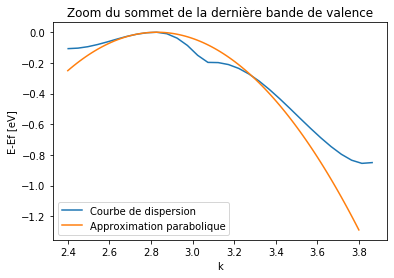

La masse effective du sommet de la dernière bande de valence vaut -7.933324375643641e-28 kg


In [286]:
h_bar = 6.582119570 * 1e-16 #eVs

#Initialisation des variables
x1 = np.zeros(20)
x2 = np.zeros(20)
E1 = np.zeros(10)
E2 = np.zeros(10)
i = 0

#Récupération des abscisses et des ordonnées à gauche et à droite du maximum de la dernière bande de valence
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    if i == 3:
        x1 = xpath
        E1 = epath['1'][15]
    elif i == 4:
        x2 = xpath
        E2 = epath['1'][15]
    i = i+1  
    
x = x1 + x2[1:len(x2)]
E = E1 + E2[1:len(E2)]

#Interpolation du second degré
lin = np.polyfit(x[7:10],E[7:10],2)
test = np.linspace(2.4,3.8,100)
E_inter = lin[0]*(test*test)+lin[1]*test+lin[2]
plt.plot(x,E, label='Courbe de dispersion')
plt.plot(test,E_inter, label='Approximation parabolique')
plt.xlabel('k')
plt.ylabel('E-Ef [eV]')
plt.title('Zoom du sommet de la dernière bande de valence')
plt.legend()
plt.show()

#Calcul de la masse effective
diff_1 = np.diff(E_inter,2)
m_e = h_bar**2/diff_1[0]
print('La masse effective du sommet de la dernière bande de valence vaut ' + str(m_e) + ' kg')

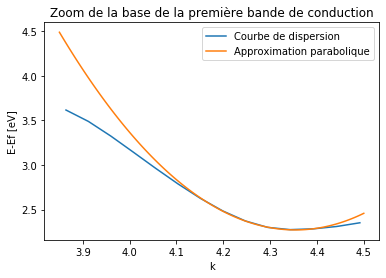

La masse effective de la base de la première bande de conduction vaut 5.760552340668372e-28 kg


In [285]:
#Initialisation des variables
#x1 = np.zeros(20)
#x2 = np.zeros(20)
#E1 = np.zeros(10)
#E2 = np.zeros(10)
i = 0

#Récupération des abscisses et des ordonnées à gauche et à droite du maximum de la dernière bande de valence
for xpath, epath in zip(Elem["distances"], Elem["energy"]):
    if i == 5:
        x1 = xpath
        E1 = epath['1'][16]
    elif i == 6:
        x2 = xpath
        E2 = epath['1'][16]
    i = i+1  
    
x = x1 + x2[1:len(x2)]
E = E1 + E2[1:len(E2)]

#Interpolation du second degré
lin = np.polyfit(x[8:12],E[8:12],2)
test = np.linspace(3.85,4.5,100)
E_inter = lin[0]*(test*test)+lin[1]*test+lin[2]
plt.plot(x,E, label='Courbe de dispersion')
plt.plot(test,E_inter, label='Approximation parabolique')
plt.xlabel('k')
plt.ylabel('E-Ef [eV]')
plt.title('Zoom de la base de la première bande de conduction')
plt.legend()
plt.show()

#Calcul de la masse effective
diff_1 = np.diff(E_inter,2)
m_e = h_bar**2/diff_1[0]
print('La masse effective de la base de la première bande de conduction vaut ' + str(m_e) + ' kg')

# 4) Références <h1>
   
**Code :**

[Band Structure of NiO](https://matgenb.materialsvirtuallab.org/2013/01/01/Bandstructure-of-NiO.html)